# Le retour du Morpion...

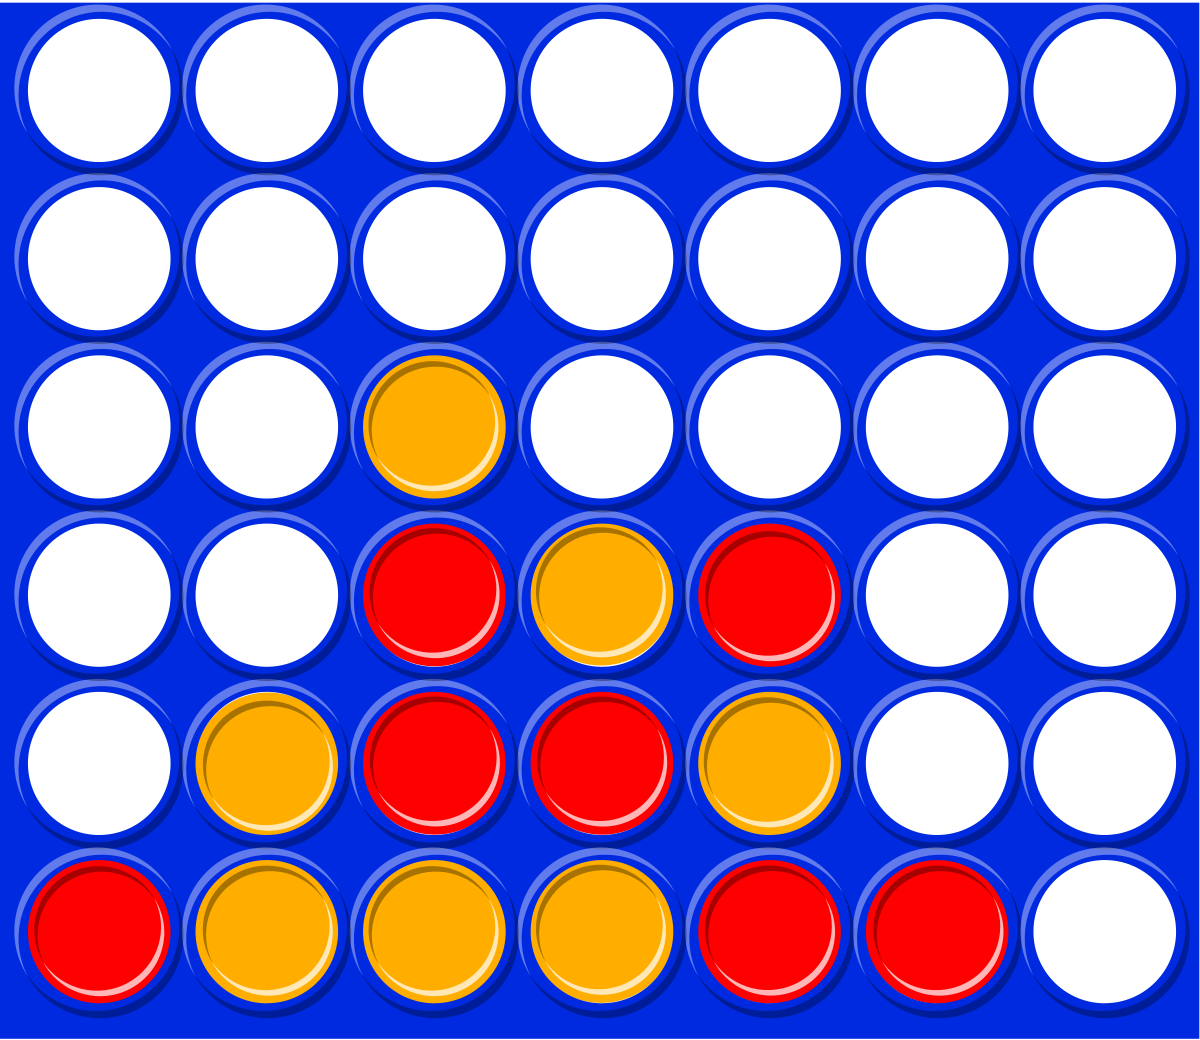

## Principe 
Nous allons cette année nous faire un peu d'IA (oui, cest la classe). Pour varier les plaisirs, ce sera un puissance 4 et pas un morpion.

Il nous faut donc commencer par un "moteur de jeu" de puissance 4...

## Travail à faire
Je vous fournis un squelette de puissance 4 qu'il va vous falloir compléter. Par rapport à l'année dernière, le tableau de jeu est maintenant passé en paramètre et le posage de pion **renvoie** un ***nouveau*** tableau de jeu sans modifier celui qui est passé en paramètre. **PAS D'EFFET DE BORD**. Il faut  donc dupliquer le tableau de jeu dans votre fonction de posage de pion dans un nouveau tableau, puis poser le pion dans ce nouveau tableau, puis renvoyer le nouveau tableau dans le ```return```. La duplication est faite déjà dans le code... dites moi merci.

Si l'on veut poser un pion du joueur 0 dans la quatrième colonne à partir du ```tableau_de_jeu``` il faudra saisir :

```tableau_de_jeu = pose_pion (tableau_de_jeu, 0, 3)```

In [ ]:
####################################################################
## TERMINALE PROJET NSI - moteur de jeu de puissance 4            ##                         PROJET de DANIEL ET MOMEN
####################################################################

# définition des "constantes"
VIDE    = '.'          # symbôle d'une case vide
JOUEURS = ('O', 'X')   # tuple qui contient les symbôles des 2 joueurs
NOMBRE_DE_LIGNES   = 6 # sans commentaire...
NOMBRE_DE_COLONNES = 7 # ...

# dictionnaire de gestion des couleurs
COULEURS = {VIDE : '\033[1;30m', JOUEURS[0] : '\033[0;31m', JOUEURS[1] : '\033[0;32m'}
REP = {True:"oui", False:"Non"}

# création du tableau de jeu principal
# c'est un tableau de NOMBRE_DE_LIGNES lignes sur NOMBRE_DE_COLONNES colonnes
tableau_de_jeu = [ [VIDE for j in range(NOMBRE_DE_COLONNES)] for i in range(NOMBRE_DE_LIGNES)]


def colonne_jouable(t, i): ### La Fonction consiste à vérifier si le numero de la colonne est valide
  '''Entrée : un tableau de jeu (t) et le numéro (i) de la colonne
     Sortie : un booléen qui est True si la colonne est jouable
     raises: provoque une erreur si la colonne n'existe pas'''
  assert i < NOMBRE_DE_COLONNES #provoque une erreur si la colonne n'existe pas
  if t[0][i] == VIDE :
    return True
  else:
    return False


def encore_au_moins_une_colonne_jouable(t): ### La Fonction consiste à vérifier si le tableau comporte encore des colonnes vides
  '''Entrée : un tableau de jeu
     Sortie : un booléen qui est True si il y a encore au moins une colonne jouable
     pour la partie qui est dans le tableau'''
  for i in t[0]:
    if i == VIDE:
      return True
    else:
      return False


def liste_des_colonnes_jouables(t): ### La Fonction consiste à parcourir toutes les colonnes et ajoute dans une liste, les colonnes vides / disponibles
  '''Entrée : un tableau de jeu
     Sortie : une liste contenant les numéros des colonnes qui sont jouables'''
  i = 0
  liste_des_colonnes = []
  for j in t[0] :
    if j == VIDE :
      liste_des_colonnes.append(i)
    i += 1
  return liste_des_colonnes


def joueur_gagnant(t): ### La Fonction consiste a vérifier toutes les possibilités de victoires
    '''Entrée : un tableau de jeu
     Sortie : le symbole du joueur gagnant ou '' s'il n'y a pas de gagnant'''
    for i in range(NOMBRE_DE_LIGNES):
      for j in range(NOMBRE_DE_COLONNES):
          case_prise = tab(i, j, t) in JOUEURS
          P4_vertical = tab(i, j, t) == tab(i+1, j, t) == tab(i+2, j, t) == tab(i+3,j,t)
          P4_horizontal = tab(i, j, t) == tab(i,j+1, t) == tab(i, j+2, t)==tab(i,j+3,t)
          P4_diagonal_hg_bd = tab(i, j, t) == tab(i + 1, j + 1, t) and tab(i, j, t) == tab(i+2, j+2, t)==tab(i+3,j+3,t)
          P4_diagonal_hd_bg = tab(i, j, t) == tab(i+1, j-1, t) and tab(i, j, t) == tab(i+2, j-2, t)==tab(i+3,j-3,t)
          case_occupee = tab(i, j, t) in JOUEURS
          if case_prise :
            if P4_vertical or P4_horizontal or P4_diagonal_hg_bd or P4_diagonal_hd_bg :
                return tab(i, j, t)
    return False
  

def il_y_a_un_gagnant(t): ### On vérifie si le joueur gagnant n'existe pas sinon il estime qu'il y a un gagnant
  '''Entrée : un tableau de jeu
     Sortie : un booléen qui est vrai s'il y a un gagnant pour la partie qui est dans le tableau'''
  if joueur_gagnant(t) == False :
    return False
  else:
    return True


def partie_terminee(t): ### On vérifie que la partie est terminée seulement s'il y a plus de colonne jouable ou s'il y a un gagnant !
  '''Entrée : un tableau de jeu 
     Sortie : un booléen qui est True si la partie qui est dans le tableau est terminée'''
  if encore_au_moins_une_colonne_jouable(t) == False or il_y_a_un_gagnant(t) == True :
    return True
  else:
    return False
  

############# fonctions gracieusement fournies par le prof ---------
# Ne pas modifier --------------------------------------------------

def affiche_tableau_de_jeu(t):
  '''Affiche le tableau de jeu dans la console
     Entrée : un tableau de jeu
     Sortie : le tableau de jeu et des informations '''
  print("  ", end=' ')
  for j in range(NOMBRE_DE_COLONNES):
    print('\033[1;37m'+str(j), end='  ')
  print()
  for i in range(NOMBRE_DE_LIGNES):
    print ('\033[1;37m'+str(i), end='  ')
    for j in range(NOMBRE_DE_COLONNES):
      print(COULEURS[t[i][j]]+t[i][j],' ', end='')
    print(COULEURS[VIDE])
  print(f"Partie terminée : {REP[partie_terminee(t)]}")
  print(f'Il y a  encore au moins une colonne jouable : {REP[encore_au_moins_une_colonne_jouable(t)]}')
  print(f"il y a un gagnant : {REP[il_y_a_un_gagnant(t)]} - ({joueur_gagnant(t)})")
  print (f'Les colonnes jouables sont les suivantes : {liste_des_colonnes_jouables(tableau_de_jeu)}')
############# fonctions gracieusement fournies par le prof ---------


def pose_pion(tableau, numero_du_joueur, i): ### On vérifie d'abord que la colonne n'est pas occupée puis on pose le pion selon le joueur et la colonne disponible
  '''Pose un pion dans la colonne i à partir du tableau de jeu "tableau".
     Entrée : un tableau de jeu, le numéro du joueur (0 ou 1) et le numéro de la colonne
     Sortie : UN NOUVEAU TABLEAU DE JEU avec le pion posé au bon endroit'''
  # afin d'éviter un effet de bord sur tableau, on commence par en faire une copie
  nouveau_tableau = [[tableau[i][j] for j in range(NOMBRE_DE_COLONNES)] for i in range(NOMBRE_DE_LIGNES)]
  # maintenant vous travaillez sur nouveau_tableau
  if colonne_jouable(nouveau_tableau, i) == False:
    return ("La colonne est pleine, choisis une autre !")
  J = JOUEURS[numero_du_joueur]
  L = NOMBRE_DE_LIGNES - 1
  while tableau[L][i] != VIDE :
    L -= 1
  nouveau_tableau[L][i] = J
  return nouveau_tableau


def tab(i, j, tableau): ### Une Fonction sentinelle
  if(i in range(NOMBRE_DE_LIGNES) and (j in range(NOMBRE_DE_COLONNES))):
    return tableau[i][j]
  return VIDE
  

def supp(t): ### Fonction permettant de supprimer un tableau (très utile pour les tests)
  for i in range(NOMBRE_DE_LIGNES):
    for j in range(NOMBRE_DE_COLONNES):
      if t[i][j] != VIDE:
        t[i][j] = VIDE


def fill(t,r): ### Fonction permettant de remplir un tableau de pion (très utile pour les tests)
  for i in range(NOMBRE_DE_LIGNES):
    for j in range(NOMBRE_DE_COLONNES):
      if t[i][j] == VIDE:
        t[i][j] = JOUEURS[r]

In [ ]:
#### HORIZONTALE
supp(tableau_de_jeu)
affiche_tableau_de_jeu(tableau_de_jeu) # affiche tableau vide
tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 2) # on pose un pion joueur 0 colonne 4
tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 3) # on pose un pion joueur 0 colonne 4
tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 4) # on pose un pion joueur 0 colonne 4
tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 5) # on pose un pion joueur 0 colonne 4
affiche_tableau_de_jeu(tableau_de_jeu) # on affiche

   0  1  2  3  4  5  6  
0  .  .  .  .  .  .  .  
1  .  .  .  .  .  .  .  
2  .  .  .  .  .  .  .  
3  .  .  .  .  .  .  .  
4  .  .  .  .  .  .  .  
5  .  .  .  .  .  .  .  
Partie terminée : Non
Il y a  encore au moins une colonne jouable : oui
il y a un gagnant : Non - (False)
Les colonnes jouables sont les suivantes : [0, 1, 2, 3, 4, 5, 6]
   0  1  2  3  4  5  6  
0  .  .  .  .  .  .  .  
1  .  .  .  .  .  .  .  
2  .  .  .  .  .  .  .  
3  .  .  .  .  .  .  .  
4  .  .  .  .  .  .  .  
5  .  .  O  O  O  O  .  
Partie terminée : oui
Il y a  encore au moins une colonne jouable : oui
il y a un gagnant : oui - (O)
Les colonnes jouables sont les suivantes : [0, 1, 2, 3, 4, 5, 6]


In [ ]:
##### VERTICALE
supp(tableau_de_jeu)
i = 4
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 1, 6)

affiche_tableau_de_jeu(tableau_de_jeu)

   0  1  2  3  4  5  6  
0  .  .  .  .  .  .  .  
1  .  .  .  .  .  .  .  
2  .  .  .  .  .  .  X  
3  .  .  .  .  .  .  X  
4  .  .  .  .  .  .  X  
5  .  .  .  .  .  .  X  
Partie terminée : oui
Il y a  encore au moins une colonne jouable : oui
il y a un gagnant : oui - (X)
Les colonnes jouables sont les suivantes : [3, 3, 3, 3, 3, 3, 3]


In [ ]:
##### DIAGONALE VERS LA DROITE
supp(tableau_de_jeu)

i = 3
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, i+1)
i = 2
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, i+2)
i = 1
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, i+3)
### DIAGONALE
i = 4 #### EN METTANT 3, la partie terminée et il y a un gagnant ne marchent pas
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 1, i)

affiche_tableau_de_jeu(tableau_de_jeu)

   0  1  2  3  4  5  6  
0  .  .  .  .  .  .  .  
1  .  .  .  .  .  .  .  
2  .  .  .  X  .  .  .  
3  .  .  X  O  .  .  .  
4  .  X  O  O  .  .  .  
5  X  O  O  O  .  .  .  
Partie terminée : oui
Il y a  encore au moins une case jouable : oui
il y a un gagnant : oui - (X)


In [ ]:
##### DIAGONALE VERS LA GAUCHE
supp(tableau_de_jeu)

i = 1
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, i+1)
i = 2
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, i+1)
i = 3
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, i+1)
i = 4
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 1, i+1)

affiche_tableau_de_jeu(tableau_de_jeu)

   0  1  2  3  4  5  6  
0  .  .  .  .  .  .  .  
1  .  .  .  .  .  .  .  
2  .  X  .  .  .  .  .  
3  .  O  X  .  .  .  .  
4  .  O  O  X  .  .  .  
5  .  O  O  O  X  .  .  
Partie terminée : oui
Il y a  encore au moins une case jouable : oui
il y a un gagnant : oui - (X)


In [ ]:
##### LORSQU'ON REMPLIE LE TABLEAU
supp(tableau_de_jeu)
fill(tableau_de_jeu,0)
affiche_tableau_de_jeu(tableau_de_jeu)

   0  1  2  3  4  5  6  
0  O  O  O  O  O  O  O  
1  O  O  O  O  O  O  O  
2  O  O  O  O  O  O  O  
3  O  O  O  O  O  O  O  
4  O  O  O  O  O  O  O  
5  O  O  O  O  O  O  O  
Partie terminée : oui
Il y a  encore au moins une case jouable : Non
il y a un gagnant : oui - (O)


In [ ]:
##### S'IL Y A AUCUN GAGNANT ET QUE LA PARTIE CONTINUE
supp(tableau_de_jeu)
i = 3
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 2)
i = 2
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 1, 2)

affiche_tableau_de_jeu(tableau_de_jeu)

   0  1  2  3  4  5  6  
0  .  .  .  .  .  .  .  
1  .  .  X  .  .  .  .  
2  .  .  X  .  .  .  .  
3  .  .  O  .  .  .  .  
4  .  .  O  .  .  .  .  
5  .  .  O  .  .  .  .  
Partie terminée : Non
Il y a  encore au moins une colonne jouable : oui
il y a un gagnant : Non - (False)
Les colonnes jouables sont les suivantes : [0, 1, 2, 3, 4, 5, 6]
Les colonnes jouables sont les suivantes : None


In [ ]:
##### ON VERIFIE S'IL RESTE ENCORE UNE COLONNE JOUABLE
supp(tableau_de_jeu)
i = 5
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 0)
i = 6
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 1)
i = 6
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 2)
i = 6
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 3)
i = 6
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 4)
i = 6
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 5)
i = 6
for i in range(i):
  tableau_de_jeu = pose_pion(tableau_de_jeu, 0, 6)

affiche_tableau_de_jeu(tableau_de_jeu) # on affiche

   0  1  2  3  4  5  6  
0  .  O  O  O  O  O  O  
1  O  O  O  O  O  O  O  
2  O  O  O  O  O  O  O  
3  O  O  O  O  O  O  O  
4  O  O  O  O  O  O  O  
5  O  O  O  O  O  O  O  
Partie terminée : oui
Il y a  encore au moins une colonne jouable : oui
il y a un gagnant : oui - (O)
Les colonnes jouables sont les suivantes : [0]
